In [66]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper

%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()


Number of apps: 
1
Total covered methods:
42192
Everything is good!


In [67]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,br.com.cardsui,br.com.cardsui.StackAdapter,"StackAdapter (Context, ArrayList, Hashtable, b...",systematic,method,0,0,1,br.com.gerenciadorfinanceiro.controller
1,br.com.cardsui,br.com.cardsui.StackAdapter,"StackAdapter (Context, ArrayList, Hashtable, b...",systematic,block,0,0,36,br.com.gerenciadorfinanceiro.controller
2,br.com.cardsui,br.com.cardsui.StackAdapter,getCount (): int,systematic,method,0,0,1,br.com.gerenciadorfinanceiro.controller
3,br.com.cardsui,br.com.cardsui.StackAdapter,getCount (): int,systematic,block,0,0,4,br.com.gerenciadorfinanceiro.controller
4,br.com.cardsui,br.com.cardsui.StackAdapter,getItem (int): CardStack,systematic,method,0,0,1,br.com.gerenciadorfinanceiro.controller


In [68]:
systematic_method_coverage = CoverageHelper.filter("method", "systematic", coverage_df)
systematic_coverage_per_app = systematic_method_coverage.groupby(["app"])['coverage_percentage'].apply(
    lambda x: x.sum() / x.count()).sort_values(ascending=False)
systematic_coverage_per_app.head()
# systematic_coverage_per_app.plot.box()


app
br.com.gerenciadorfinanceiro.controller    1.090254
Name: coverage_percentage, dtype: float64

In [69]:
random_method_coverage = CoverageHelper.filter("method", "random", coverage_df)
random_coverage_per_app = random_method_coverage.groupby(["app"])['coverage_percentage'].apply(
    lambda x: x.sum() / x.count()).sort_values(ascending=False)
random_coverage_per_app.head()
# random_coverage_per_app.plot.box()

app
br.com.gerenciadorfinanceiro.controller    1.422071
Name: coverage_percentage, dtype: float64

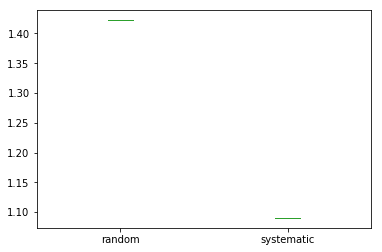

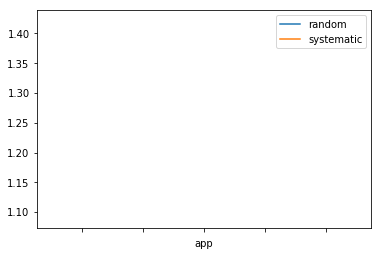

In [70]:
random_and_systematic_coverage = pd.concat(
    [random_coverage_per_app.rename('random'), systematic_coverage_per_app.rename('systematic')], axis=1,
    sort=False)
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.plot()

In [71]:
random_and_systematic_coverage.describe()

,random,systematic
count,1.000000,1.000000
mean,1.422071,1.090254
std,NaN,NaN
min,1.422071,1.090254
25%,1.422071,1.090254
50%,1.422071,1.090254
75%,1.422071,1.090254
max,1.422071,1.090254


In [72]:
random_block_coverage_per_app = random_coverage_per_app = \
    CoverageHelper.filter("block", "random", coverage_df).groupby(["app"])[
        ['covered_lines', 'total_lines']].apply(
        lambda x: x.sum())
random_block_coverage_per_app['percentage_covered'] = (random_block_coverage_per_app.covered_lines / random_block_coverage_per_app.total_lines) * 100
random_block_coverage_per_app.head()
random_block_coverage_per_app.describe()


,covered_lines,total_lines,percentage_covered
count,1.0,1.0,1.000000
mean,3383.0,329173.0,1.027727
std,NaN,NaN,NaN
min,3383.0,329173.0,1.027727
25%,3383.0,329173.0,1.027727
50%,3383.0,329173.0,1.027727
75%,3383.0,329173.0,1.027727
max,3383.0,329173.0,1.027727


In [73]:
systematic_block_coverage_per_app = systematic_coverage_per_app = CoverageHelper.filter("block", "systematic", coverage_df).groupby(["app"])[
    ['covered_lines', 'total_lines']].apply(
    lambda x: x.sum())
systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
systematic_block_coverage_per_app.head()
systematic_block_coverage_per_app.describe()


,covered_lines,total_lines,percentage_covered
count,1.0,1.0,1.000000
mean,2651.0,329173.0,0.805352
std,NaN,NaN,NaN
min,2651.0,329173.0,0.805352
25%,2651.0,329173.0,0.805352
50%,2651.0,329173.0,0.805352
75%,2651.0,329173.0,0.805352
max,2651.0,329173.0,0.805352


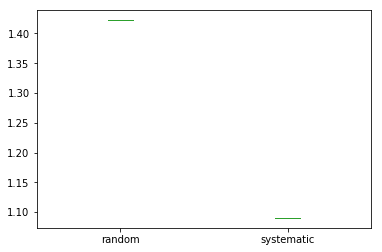

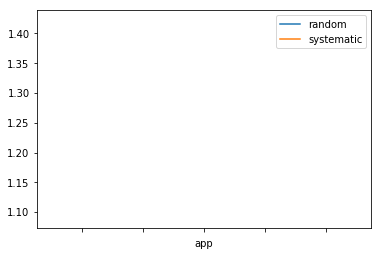

In [74]:
random_and_systematic_block_coverage = pd.concat(
    [random_block_coverage_per_app.percentage_covered.rename('random'), systematic_block_coverage_per_app.percentage_covered.rename('systematic')], axis=1,
    sort=False)
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.plot()

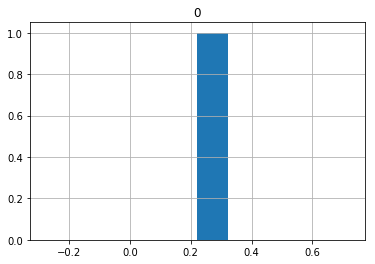

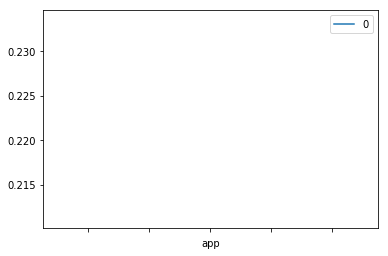

In [75]:
diff_in_coverage_per_app = random_and_systematic_block_coverage['random'] - random_and_systematic_block_coverage['systematic']
# systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
diff_in_coverage_per_app = diff_in_coverage_per_app.to_frame()
diff_in_coverage_per_app.hist()
diff_in_coverage_per_app.plot()
# diff_in_coverage_per_app